# Topics

## Cumulative Decades:

### 1849-1870:
+ 2,"satan, enemy, peace, minister, religion, strength"
+ 3,"faithful, overcome, trial, writes, praise, trying"
+ 4,"sanctuary, israel, covenant, verse, moses, priest"
+ 9,"nation, government, pope, rome, france, europe"
+ 11,"text, moses, fourth, argument, disciple, institution"
+ 13,"beast, daniel, king, verse, image, horn"
+ 19,"sunday, century, history, ancient, council, festival"
+ 20,"immortality, idea, existence, sense, immortal, punishment"
+ 21,"prophecy, sign, event, prophet, fulfillment, fulfilled"
+ 23,"crime, slavery, president, murder, noah, rebellion"

health/character
+ 0,"woman, dress, mother, lady, husband, wife"
+ 1,"principle, moral, object, religious, character, article"
+ 17,"tobacco, habit, appetite, temperance, drink, flesh"
+ 22,"health, disease, food, water, meal, stomach"


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import GoH.modeldata
import GoH.modelviz
import GoH.utilities
import gspread
import matplotlib
from oauth2client.service_account import ServiceAccountCredentials
import os
import pandas as pd

In [3]:
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/Users/jeriwieringa/Dissertation/drafts/code/secrets/dissertation-881847769b13.json', scope)

gc = gspread.authorize(credentials)

In [4]:
colors = ['#4e79a7', '#f28e2b', '#b07aa1']

In [5]:
def create_piechart(df, topic_id, colors):
    return df.groupby('match?')['doc_id'].agg(pd.Series.nunique).plot(kind='pie', 
                                                             colors=colors, 
                                                             shadow=True, 
                                                             startangle=90, 
                                                             autopct='%.2f%%',
                                                             title='Percentage of Top 30 Docs from \nCumulative Decade 1849-1870 Model \nthat "Match" Topic {}'.format(topic_id)
                                                            )

In [6]:
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [7]:
base_dir = "/Users/jeriwieringa/Dissertation/drafts/data/module-3/"
model_scheme = "cumulative_decades"
period = "1849-to-1870"

In [8]:
labels = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_topicLabels.csv'.format(model_scheme, period)))

In [9]:
# Topics to filter by
topics = [2,3,4,9,11,13,19,20,21,23,0,1,17,22]

In [10]:
df = GoH.modeldata.model_to_df(base_dir, model_scheme, period )

In [11]:
df_filtered = GoH.modeldata.filter_dataframe_by_dates(df, 1859, 1870)

## Time Series

In [12]:
time_series = GoH.modeldata.topic_series(df, ['year', 'topic_id'], labels)

In [13]:
ts = time_series[time_series['topic_id'].isin(topics)]

In [14]:
ts = ts.pivot('year', 'topic_words', 'normalized_weight')

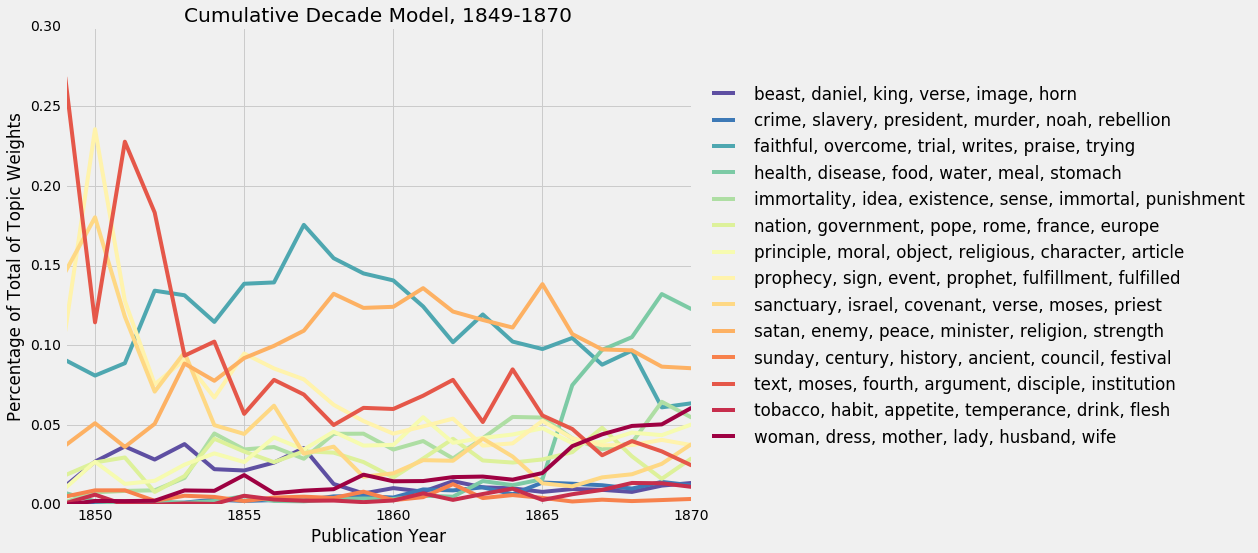

In [15]:
matplotlib.pyplot.figure()
ax = ts.plot(figsize=(10,8), colormap='Spectral_r', title='Cumulative Decade Model, 1849-1870')
ax.set_xlabel("Publication Year")
ax.set_ylabel("Percentage of Total of Topic Weights")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Review Docs

In [16]:
wtm = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_wtm.csv'.format(model_scheme, period)))

In [17]:
dts = gc.open('EvaluateCorpus')
worksheet = dts.get_worksheet(1)

scores = pd.DataFrame(worksheet.get_all_records())

### 2,"satan, enemy, peace, minister, religion, strength"

In [18]:
t2 = wtm[wtm['topic_id'] == 2]

In [19]:
print(', '.join(t2['token'].tolist()))

satan, enemy, peace, minister, religion, strength, influence, sinner, devil, mercy, face, cross, deep, danger, turn, dark, strong, moment, tear, scene


Hypothesis: Ambiguous -- sense of persevering through some trouble

In [20]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 2)

In [21]:
df2 = scores[scores['topic'] == 2]

In [22]:
df2

,description,doc_id,match?,topic
1,EGW on the power of satan,RH18620513-V19-24-page3.txt,yes,2
2,discussion of the errors of the churches. auth...,RH18621216-V21-03-page2.txt,yes,2
3,letter from Cottrell to Hull defending Adventi...,RH18640126-V23-09-page2.txt,partial,2
4,danger of popularity for ministers; various te...,RH18610205-V17-12-page1.txt,yes,2
5,need for more affect in prayer; calls to Chris...,RH18630721-V22-08-page3.txt,partial,2
6,selections on the Christian life,RH18600209-V15-12-page3.txt,no,2
7,invocations to keep the faith and continue doi...,RH18690914-V34-12-page3.txt,no,2
8,"selections on the Christian life: shouting, so...",RH18651212-V27-02-page3.txt,yes,2
9,"""Pilate's tale"" of meeting Jesus",RH18610716-V18-07-page3.txt,partial,2
10,discussion of the error of the church and the ...,RH18621216-V21-03-page1.txt,partial,2


Conclusions: Unclear. Some on Satan, some on the Christian life broadly speaking

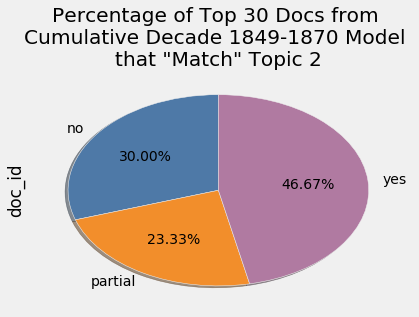

In [23]:
create_piechart(df2, 2, colors)

### 3,"faithful, overcome, trial, writes, praise, trying"

In [24]:
t3 = wtm[wtm['topic_id'] == 3]

In [25]:
print(', '.join(t3['token'].tolist()))

faithful, overcome, trial, writes, praise, trying, felt, present_truth, trust, striving, truly, mercy, keeping, rejoice, heavenly, precious, privilege, walk, died, thank


Hypothesis: Letters from readers offering testimony and expressing belief

In [26]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 3)

In [27]:
df3 = scores[scores['topic'] == 3]

In [28]:
df3

,description,doc_id,match?,topic
32,Letters from readers offering testimony and en...,RH18680825-V32-10-page11.txt,yes,3
33,Letters from readers offering testimony and en...,RH18680706-V32-03-page11.txt,yes,3
34,Letters from readers offering testimony and en...,RH18670813-V30-09-page11.txt,yes,3
35,Letters from readers offering testimony and en...,RH18600112-V15-08-page7.txt,yes,3
36,Letters from readers offering testimony and en...,RH18630901-V22-14-page7.txt,yes,3
37,Letters from readers offering testimony and en...,RH18670702-V30-03-page11.txt,yes,3
38,Letters from readers offering testimony and en...,RH18680602-V31-24-page11.txt,yes,3
39,Letters from readers offering testimony and en...,RH18680107-V31-04-page11.txt,yes,3
40,Letters from readers offering testimony and en...,RH18660731-V28-09-page7.txt,yes,3
41,Letters from readers offering testimony and en...,RH18680714-V32-04-page11.txt,yes,3


Conclusions: Strongly correlates with letters from readers

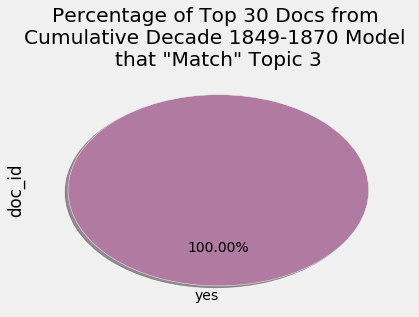

In [29]:
create_piechart(df3, 3, colors[2:])

### 11,"text, moses, fourth, argument, disciple, institution"

In [30]:
t11 = wtm[wtm['topic_id'] == 11]

In [31]:
print(', '.join(t11['token'].tolist()))

text, moses, fourth, argument, disciple, institution, change, proof, creation, prove, new_testament, resurrection, verse, kept, rested, keeping, observance, sunday, jewish, luke


Hypothesis: Arguments for the Seventh-day Adventist theology, particularly Sabbath

In [32]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 11)

In [33]:
df11 = scores[scores['topic'] == 11]

In [34]:
df11

,description,doc_id,match?,topic
63,argument for seventh-day sabbath,"RH18600529-V16-01,02-page10.txt",yes,11
64,argument for seventh-day sabbath,RH18650314-V25-15-page2.txt,yes,11
65,argument for seventh-day sabbath and 6 day cre...,RH18650314-V25-15-page3.txt,yes,11
66,history of the sabbath,RH18611217-V19-03-page2.txt,yes,11
67,arguments for seventh-day sabbath,RH18600605-V16-03-page2.txt,yes,11
68,history of the sabbath,RH18590714-V14-08-page1.txt,yes,11
69,history of the sabbath,RH18611203-V19-01-page2.txt,yes,11
70,arguments for seventh-day sabbath,"RH18600529-V16-01,02-page11.txt",yes,11
71,arguments for seventh-day sabbath,RH18680421-V31-19-page8.txt,yes,11
72,arguments for seventh-day sabbath,RH18651226-V27-04-page4.txt,yes,11


Conclusions: Strongly correlates with Sabbath debates

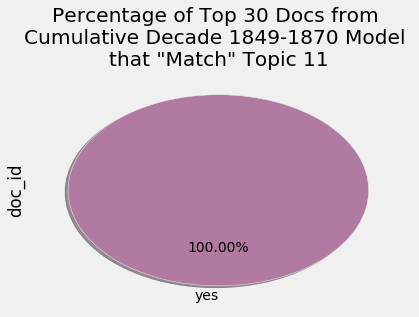

In [35]:
create_piechart(df11, 11, colors[2:])

### 22,"health, disease, food, water, meal, stomach"

In [36]:
t22 = wtm[wtm['topic_id'] == 22]

In [37]:
print(', '.join(t22['token'].tolist()))

health, disease, food, water, meal, stomach, physician, patient, diet, eating, meat, treatment, bread, cure, fever, medicine, cold, bath, sick, drug


Hypothesis: Description of health reform

In [38]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 22)

In [39]:
df22 = scores[scores['topic'] == 22]

In [40]:
df22

,description,doc_id,match?,topic
94,"recipes for breads, puddings, mushes",HR18680501-V02-11-page15.txt,yes,22
95,diseases and their treatments: fevers,HR18680501-V02-11-page5.txt,yes,22
96,health trivia and question/answer,HR18700701-V05-01-page7.txt,yes,22
97,symptom and treatment of measles,HR18680301-V02-09-page10.txt,yes,22
98,treatment for bilious colic and severe congestion,HR18671001-V02-04-page13.txt,yes,22
99,description and treatment of scarlet fever,HR18700301-V04-09-page11.txt,yes,22
100,treatment of typhoid fever and piles,HR18671101-V02-05-page12.txt,yes,22
101,health question and answer: dyspepsia; cancer;...,HR18680801-V03-02-page13.txt,yes,22
102,answers to correspondents,HR18690901-V04-03-page10.txt,yes,22
103,health q/a; description of diseases,HR18690201-V03-08-page21.txt,yes,22


Conclusions: Strongly correlates with descriptions of health reform practices

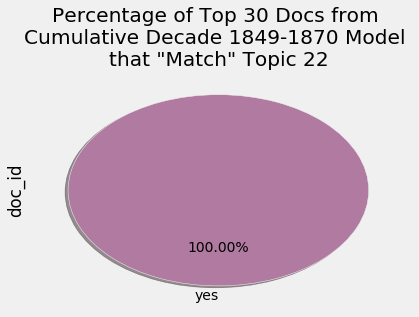

In [41]:
create_piechart(df22, 22, colors[2:])